In [2]:
import os
from collections import OrderedDict

import numpy as np

import pygpc

import h5py

from matplotlib import pyplot as plt

from dagma.linear import DagmaLinear
from dagma.nonlinear import DagmaMLP, DagmaNonlinear

from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import IIDSimulation, DAG

In [71]:
fn_results = os.path.join(os.getcwd(), "data")

## Define model
model = pygpc.testfunctions.Ishigami()

## Define parameters
parameters = OrderedDict()
parameters["x1"] = pygpc.Beta(pdf_shape=[1, 1], pdf_limits=[-np.pi, np.pi])
parameters["x2"] = pygpc.Beta(pdf_shape=[1, 1], pdf_limits=[-np.pi, np.pi])
parameters["x3"] = pygpc.Beta(pdf_shape=[1, 1], pdf_limits=[-np.pi, np.pi])
parameters["a"] = 7.0
parameters["b"] = 0.1

# Define problem
problem = pygpc.Problem(model, parameters)

# gPC options
options = dict()
options["solver"] = "LarsLasso"
options["settings"] = None
options["order_start"] = 3
options["order_end"] = 15
options["seed"] = 1
options["projection"] = False
options["order_max_norm"] = 1.
options["interaction_order"] = 2
options["matrix_ratio"] = 2
options["n_cpu"] = 0
options["gradient_enhanced"] = False
options["gradient_calculation"] = "standard_forward"
options["error_type"] = "loocv"
options["error_norm"] = "absolute"
options["n_samples_validation"] = 1e2
options["qoi"] = 0
options["classifier"] = "learning"
options["n_samples_discontinuity"] = 10
options["adaptive_sampling"] = True
options["eps"] = 0.03
options["n_grid_init"] = 100
options["GPU"] = False
options["fn_results"] = fn_results
options["classifier_options"] = {"clusterer": "KMeans",
                                 "n_clusters": 2,
                                 "classifier": "MLPClassifier",
                                 "classifier_solver": "lbfgs"}

# define algorithm
algorithm = pygpc.MERegAdaptiveProjection(problem=problem, options=options)

# Initialize gPC Session
session = pygpc.Session(algorithm=algorithm)

# Run gPC session
session, coeffs, results = session.run()

# # Post-process gPC
# pygpc.get_sensitivities_hdf5(fn_gpc=options["fn_results"],
#                              output_idx=None,
#                              calc_sobol=True,
#                              calc_global_sens=True,
#                              calc_pdf=True,
#                              algorithm="sampling",
#                              n_samples=1e4)

# with h5py.File(fn_results + "_validation.hdf5", "r") as f:
#     val_coords_norm = f["grid/coords_norm"][:]
#     val_coords = f["grid/coords"][:]
#     val_results = f["model_evaluations/original_all_qoi"][:]

# # Validate gPC vs original model function (2D-slice)
# pygpc.validate_gpc_plot(session=session,
#                         coeffs=coeffs,
#                         random_vars=["w_ein_pc", "w_iin_pc"],
#                         coords=val_coords,
#                         data_original=val_results,
#                         output_idx=0,
#                         fn_out=session.fn_results + '_val',
#                         n_cpu=session.n_cpu)

Creating initial grid (Random) with n_grid=100
Performing 100 initial simulations!
It/Sub-it: 3/2 Performing simulation 001 from 100 [                                        ] 1.0%
Total function evaluation: 0.014951467514038086 sec
Determining gPC approximation for QOI #0:
Determining gPC domains ...


2024-07-22 16:54:10,597 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

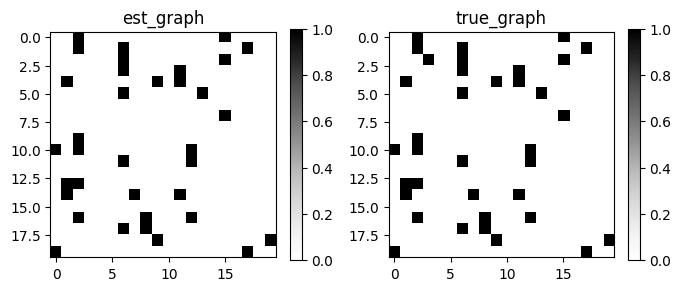

2024-07-22 16:54:15,748 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

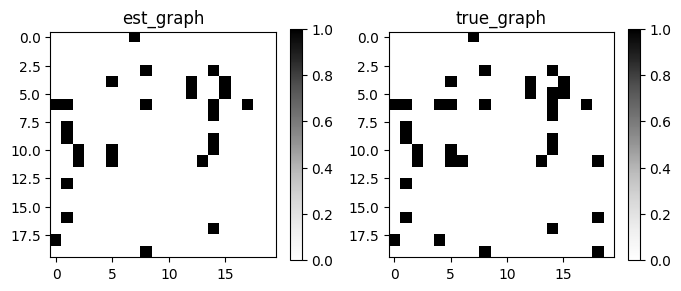

2024-07-22 16:54:20,822 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

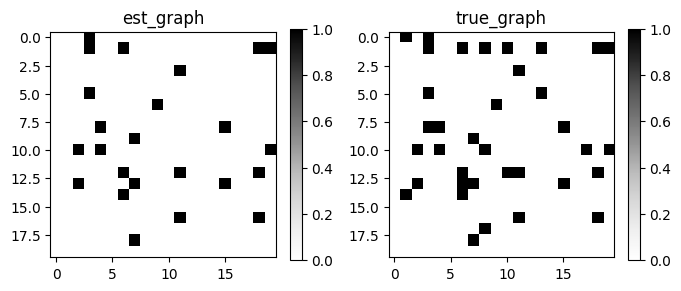

2024-07-22 16:54:25,469 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

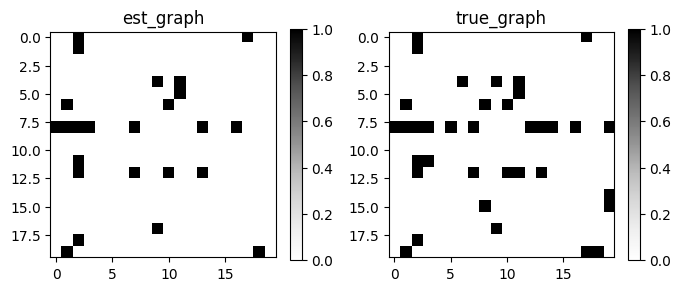

2024-07-22 16:54:30,663 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

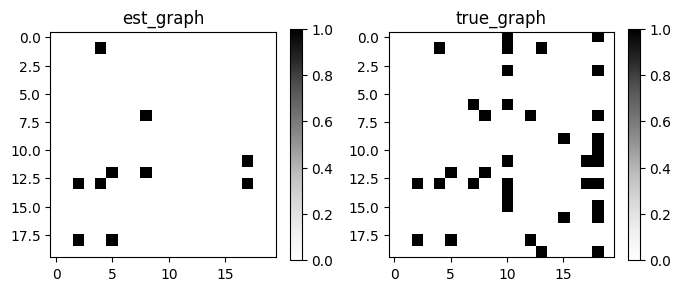

2024-07-22 16:54:36,000 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

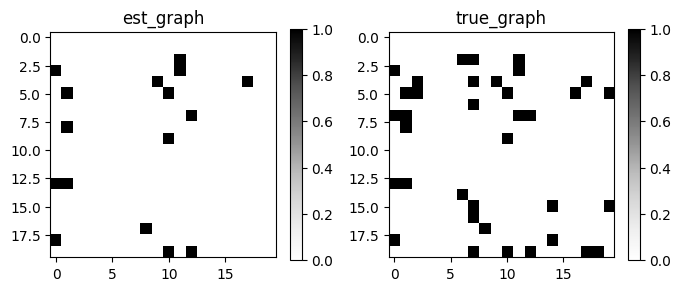

2024-07-22 16:54:40,095 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

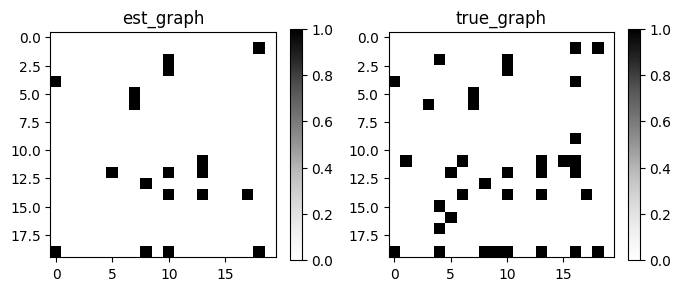

2024-07-22 16:54:43,891 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

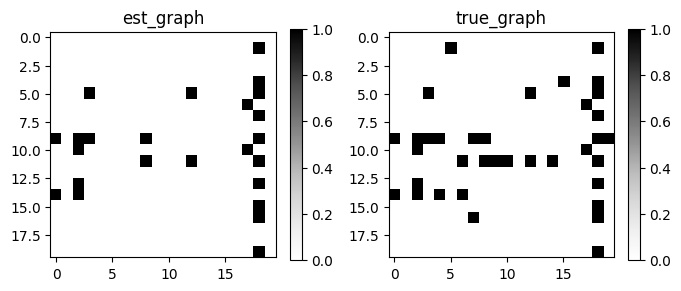

2024-07-22 16:54:48,266 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

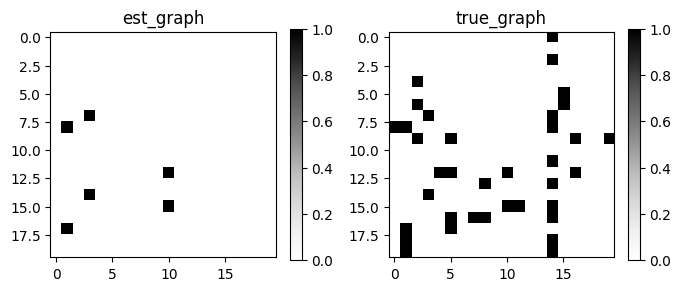

2024-07-22 16:54:53,713 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

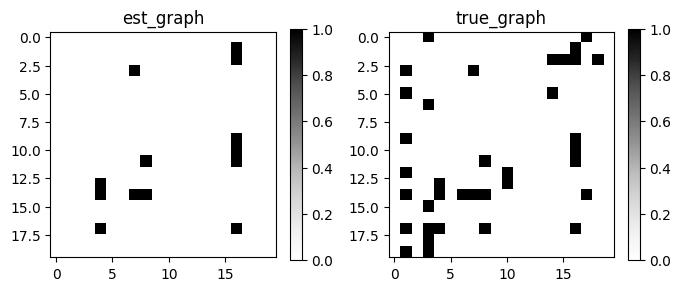

In [14]:
noise_lst = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
recall_lst = []

for noise in noise_lst:
    dag = DAG.scale_free(n_nodes=20, n_edges=30)
    data = IIDSimulation(W=dag, n=1000, method='linear', sem_type='gauss', noise_scale=noise)

    model = DagmaLinear(loss_type='l2')
    W_est = (model.fit(data.X) > 0.5).astype("int32")
    GraphDAG(W_est, data.B)

    metrics = MetricsDAG(W_est, data.B)
    recall_lst.append(metrics.metrics['recall'])
    # print(metrics.metrics)

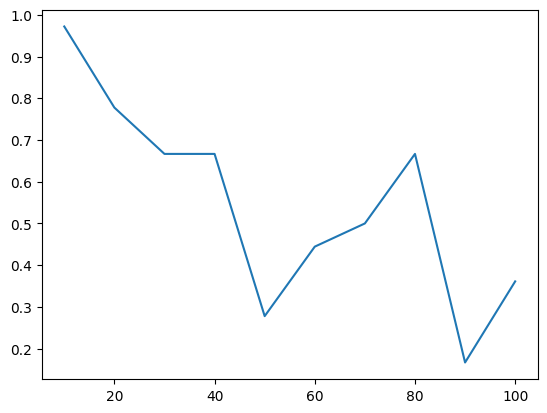

In [16]:
from matplotlib import pyplot as plt

plt.plot(noise_lst, recall_lst)
# recall_lst

In [18]:
data.X.shape

(1000, 20)

In [19]:
import seaborn as sns

<Axes: ylabel='Count'>

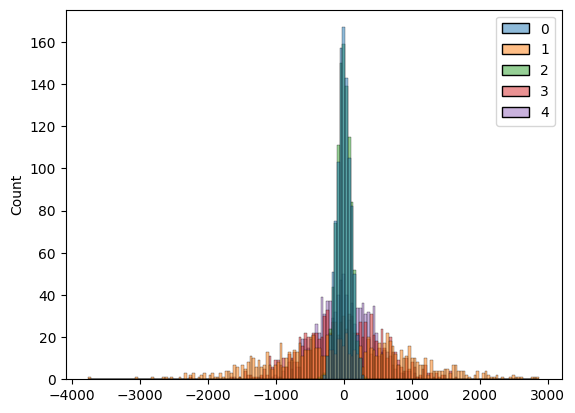

In [24]:
sns.histplot(data=data.X[:, :5])

In [ ]:
from pygpc import AbstractModel

class DagmaLinearCausalDiscoveryModel(AbstractModel):

    def __init__(self, n_nodes, n_edges, n_samples, method, sem_type):
        self.n_nodes = n_nodes
        self.n_edges = n_edges
        self.n_samples = n_samples
        self.method = method
        self.sem_type = sem_type
        self.model = DagmaLinear(loss_type='l2')
    
    def simulate(self, process_id=None, matlab_engine=None):
        W_res_lst = []
        for noise_scale in self.p["noise_scale"]:
            W_true = DAG.scale_free(n_nodes=self.n_nodes, n_edges=self.n_edges)
            data = IIDSimulation(W=W_true, n=self.n_samples, method=self.method, sem_type=self.sem_type, noise_scale=float(noise_scale))
            W_est = (self.model.fit(data.X) > 0.5).astype("int32")
            W_res_lst.append((W_true - W_est).flatten())
        return np.stack(W_res_lst, axis=0)
    


In [67]:
model = DagmaLinearCausalDiscoveryModel(10, 20, 10, 'linear', 'gauss')
model.set_parameters({"noise_scale": np.array([1, 2, 3])})
res = model.simulate()

2024-07-22 16:42:23,988 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

2024-07-22 16:42:31,412 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

2024-07-22 16:42:41,182 - c:\Users\q619374\AppData\Local\miniconda3\envs\causal\Lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


  0%|          | 0/180000.0 [00:00<?, ?it/s]

In [70]:
res.shape

(3, 100)

In [ ]:
fn_results = os.path.join(os.getcwd(), "data")

## Define model
model = pygpc.testfunctions.Ishigami()
model = DagmaLinearCausalDiscoveryModel(10, 20, 100, 'linear', 'gauss')

## Define parameters
parameters = OrderedDict()
parameters["noise_scale"] = pygpc.Beta(pdf_shape=[1, 1], pdf_limits=[0, 100])

# Define problem
problem = pygpc.Problem(model, parameters)

# gPC options
options = OrderedDict()
options["method"] = "Reg"
options["order"] = [10]
options["order_max"] = [10]    
options["order_max_norm"] =  2.
options["interaction_order"] = 1
options["fn_results"] = "./results.hdf5"
    
# Define algorithm
algorithm = pygpc.Static(problem=problem, options=options)

# Initialize gPC Session
session = pygpc.Session(algorithm=algorithm)

# Run gPC session
session, coeffs, results = session.run()


In [ ]:
W_true = DAG.scale_free(n_nodes=self.n_nodes, n_edges=self.n_edges)
data = IIDSimulation(W=W_true, n=self.n_samples, method=self.method, sem_type=self.sem_type, noise_scale=float(noise_scale))
W_est = (self.model.fit(data.X) > 0.5).astype("int32")
W_res_lst.append((W_true - W_est).flatten())